# Проект: Исследование объявлений о продаже квартир

**Описание исследования:**

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. От нас требуется провести анализ данных и дополнить их для последующего построения автоматизированной системы, которая будет отслеживать аномалии и мошенническую деятельность.

**Цель исследования:**

Обнаружить и описать зависимости между ценами на недвижимость и различными параметрами.

**Задачи исследования:**
* Изучить общую информацию о данных
* Провести предобработку данных
* Дополнить данные
* Ответить на поставленные вопросы 
* Сформулировать выводы


**Исходные данные:**

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

*'airports_nearest'* -  расстояние до ближайшего аэропорта в метрах (м)

*'balcony'* - число балконов

*'ceiling_height'* - высота потолков (м)

*'cityCenters_nearest'* - расстояние до центра города (м)

*'days_exposition'* - сколько дней было размещено объявление (от публикации до снятия)

*'first_day_exposition'* - дата публикации

*'floor'* - этаж

*'floors_total'* - всего этажей в доме

*'is_apartment'* - апартаменты (булев тип) 

*'kitchen_area'* - площадь кухни в квадратных метрах (м²)

*'last_price'* - цена на момент снятия с публикации

*'living_area'* - жилая площадь в квадратных метрах (м²)

*'locality_name'* - название населённого пункта

*'open_plan'* - свободная планировка (булев тип)

*'parks_around3000'* - число парков в радиусе 3 км

*'parks_nearest'* - число водоёмов в радиусе 3 км

*'ponds_nearest'* - расстояние до ближайшего водоёма (м)

*'rooms'* - число комнат

*'studio'* - квартира-студия (булев тип)

*'total_area'* - площадь квартиры в квадратных метрах (м²)

*'total_images'* - число фотографий квартиры в объявлении


**Разделим исследование на части**

***Часть 1. Изучение общей информации:***
* [1. Изученеие файлов с данными, получение общей информации, загрузка библиотек.](#step1)

***Часть 2. Предподготовка данных:***
* [1. Новые имена для столбцов.](#step2_1)
* [2. Ликвидация пропусков и приведение данных к нужным типам.](#step2_2)
* [3. Поиск и удаление дубликатов.](#step2_3)

***Часть 3. Расчеты и добавление результатов в таблицу:***
* [1. Цена квадратного метра.](#step3_1)
* [2. День недели, месяц и год публикации объявления.](#step3_2)
* [3. Этаж квартиры; варианты — первый, последний, другой.](#step3_3)
* [4. Соотношение жилой и общей площади, а также отношение площади кухни к общей.](#step3_4)

***Часть 4. Исследовательский анализ данных:***
* [1. Изучаем параметры: площадь, цена, число комнат, высота потолков.](#step4_1)
* [2. Изучаем время продажи квартиры.](#step4_2)
* [3. Убираем редкие и выбивающиеся значения.](#step4_3)
* [4. Изучите зависимость цены от различных факторов.](#step4_4)
* [5. Изучаем 10 населённых пунктов с наибольшим числом объявлений.](#step4_5)
* [6. Выясняем, какая область входит в центр Санкт-Петербурга.](#step4_6)
* [7. Изучаем центр Санкт-Петербурга.](#step4_7)

***Часть 5. Общий вывод:***
* [Вывод.](#step5)

**[Чек-лист готовности проекта:](#step6)**

<a id = 'step1'></a>
# 1. Изучение данных из файла

In [1]:
#импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

In [2]:
#считываем файл

if os.path.exists('real_estate_data.csv'):
    data = pd.read_csv('real_estate_data.csv', sep= '\t') # локальный путь
else:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep= '\t') # путь указанный в проекте 

In [3]:
#смотрим первые 10 строк
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
#общая информация о файле
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-block alert-info">
    
**Вывод**

Первое, что бросается в глаза, - наличие пропусков и названия столбцов 'cityCenters_nearest', 'parks_around3000' и 'ponds_around3000'. Что касается имен колонок, это непринципиально, но исправим их далее. Ещё обратим внимание на тип данных в столбцах 'parks_around3000', 'ponds_around3000', 'floors_total', и 'balcony'. Вряд ли в окрестности дома может быть 2,5 водоема, а в квартире 1,5 балкона. Тип данных в этих колонках нужно будет изменить на целочисленный. Также необходимо будет заменить тип данных в столбцах 'first_day_exposition' и 'days_exposition'. 
    
</div>

<a id = 'step2_1'></a>
# 2. Предобработка данных

In [5]:
#переименуем столбцы 
data = data.rename(columns ={'cityCenters_nearest':'distance_to_centre', 'parks_around3000':'neighbor_parks', 'ponds_around3000':'neighbor_ponds'})
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'distance_to_centre',
       'neighbor_parks', 'parks_nearest', 'neighbor_ponds', 'ponds_nearest',
       'days_exposition'],
      dtype='object')

In [6]:
#проверяем данные на наличие пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
distance_to_centre       5519
neighbor_parks           5518
parks_nearest           15620
neighbor_ponds           5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-block alert-info">
    
**Комментарий студента**

Сначала обработуем наиболее очевидные пропуски. Подробнее изучим столбец 'ceiling_height' - высота потолков.

<AxesSubplot:ylabel='Frequency'>

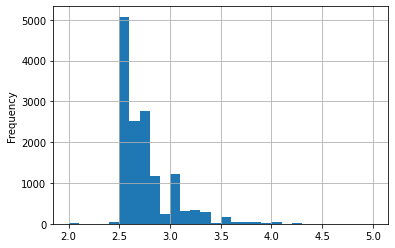

In [7]:
#строим гистограмму по значениям высоты потолков
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, grid = True, range = (2,5))

In [8]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<div class="alert alert-block alert-info">
    
**Комментарий студента**

В столбце 'ceiling_height' есть как необосновано большие - 100м, так и маленьке - 1м - знaчения (встречаются по одному разу).Пока их оставим, а пропуски заменим медианным значением, т.к. в большинстве случаев высота потолков примерно одинаковая.<br>
Также у нас есть пропуски в столбце 'floors_total' - число этажей в доме. Всего строк с пропущенными значениями в этом столбце - 86, что довольно мало по сравнению с общим количеством строк, поэтому их можно удалить. Аналогично  действуем со столбцом 'locality_name' (49 пропущенных строк)<br>
Здесь же можно заменить пропуски в столбце 'balcony' - число балконов. Предполагаем, что если человек не указал число балконов, то, скорее всего, их нет. Такие пропуски заменим на 0.<br>
    
Пропуски в этих столбцах могли появиться из-за человеческого фактора. Например, пользователь точно не знал высоту потолка и не заполнил данные в этом столбце, а количесвто этажей в доме посчитал не столь важной информацией.
</div>

In [9]:
#смотрим на данные с пропусками в столбце 'ceiling_height'
data[data['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,distance_to_centre,neighbor_parks,parks_nearest,neighbor_ponds,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,NaN,...,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23690,3,5500000.0,52.0,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.0,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23692,2,1350000.0,30.0,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.0,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [10]:
#процент пропусков в столбце с потолками
data[data['ceiling_height'].isna()]['total_area'].count()/data['ceiling_height'].shape[0]*100

38.799105447487236

In [11]:
#заполняем пропуски медианным значением в столбце 'ceiling_height'
#data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

#заполняем пропуски нулем в столбце 'balcony' и заменим тип на 'int'
data['balcony'] = data['balcony'].fillna(0).astype('int')

#удаляем строки с пропущенным значением в столбцах 'floors_total' и 'locality_name'
data.dropna(subset = ['floors_total', 'locality_name'], inplace = True)

#заменим тип на 'int'
data['floors_total'] = data['floors_total'].astype('int')

In [12]:
data[['first_day_exposition','days_exposition']]

,first_day_exposition,days_exposition
0,2019-03-07T00:00:00,NaN
1,2018-12-04T00:00:00,81.0
2,2015-08-20T00:00:00,558.0
3,2015-07-24T00:00:00,424.0
4,2018-06-19T00:00:00,121.0
...,...,...
23694,2017-03-21T00:00:00,NaN
23695,2018-01-15T00:00:00,45.0
23696,2018-02-11T00:00:00,NaN
23697,2017-03-28T00:00:00,602.0


In [13]:
#переведем столбец с датой в формат даты без времени, т.к. время не указано
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [14]:
#new
#создаем столбец года. он понадобится уже сейчас
data['year_exposition'] = data['first_day_exposition'].dt.year

#сводная таблица по рекомендации
data[data['days_exposition'].isnull()].pivot_table(columns = 'year_exposition', values = 'total_area', aggfunc = 'count')

year_exposition,2014,2015,2016,2017,2018,2019
total_area,18,70,67,271,957,1788


In [15]:
#заменим пропуски в days_exposition и заменим тип данных
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

In [16]:
data['is_apartment'].value_counts()

False    2710
True       50
Name: is_apartment, dtype: int64

<div class="alert alert-block alert-info">
    
**Комментарий студента**
    
Очень большой процент пропущенных значений в столбце 'is_apartment'. Из тех строк, где указан этот параметр, большинство значений False. Возможно, не все люди понимают, что именно подразумевается под словом "апартаменты", поэтому не заполнили эту графу. В России апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания. Будем считать, что данные предоставлены по помещениям, которые можно отнести к жилищному фонду, поэтому заполним пропуски значением False.
</div>

In [17]:
#заполняем пропуски в 'is_apartment' знаечением 'False',
#предварительно заменили тип данных, т.к. в описании проекта в этой графе стоит булев тип
data['is_apartment'].astype('bool')
data['is_apartment'].fillna(False, inplace = True)

In [18]:
#рассмтрим столбец 'living_area' - жилая площадь в квадратных метрах
data['living_area'].describe()

count    21700.000000
mean        34.454822
std         22.045359
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

(0.0, 200.0)

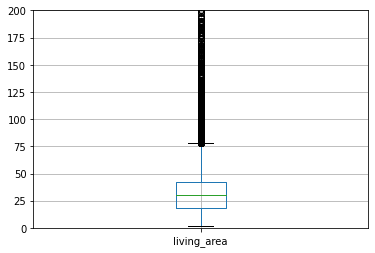

In [19]:
data.boxplot(column='living_area')
plt.ylim(0,200)

<div class="alert alert-block alert-info">
    
**Комментарий студента**
    
Здесь также встречаются аномально большие и маленькие значения, а также есть выбросы. Всего пропущенных значений около 8% от всей выборки. Считаю, что можно заменить их на медианное значение.
</div>

In [20]:
data['living_area'] = data['living_area'].fillna(data['living_area'].median())

In [21]:
#data.isna().mean().map('{:.2%}'.format)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
distance_to_centre       5501
neighbor_parks           5500
parks_nearest           15535
neighbor_ponds           5500
ponds_nearest           14529
days_exposition             0
year_exposition             0
dtype: int64

In [22]:
#проверим данные на наличие неявных дубликатов в столбце  'locality_name'

#смотрим уникальные значения
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

<div class="alert alert-block alert-info">
    
**Комментарий студента**
    
Есть несколько значений, которые повторяются неявно, например: "Мурино", "поселок Мурино", "посёлок Мурино". Сразу можно заменить все буквы "е" на "ё". Также можем на всякий случай перевести названия поселков в нижний регистр.<br>
Список очень длинный, и сложно зрительно выцепить неявные дубликаты. Поэтому поступим так: создадим словарь, где ключом будет является самая короткая строка (мурино), а в значении будет лежать список из наименований населенного пункта, куда входит самая короткая строка ([поселок мурино]).
</div>

In [23]:
#заменяем символ 'е', переводим в нижний регистр
data['locality_name'] = data['locality_name'].str.replace('ё','е').str.lower()

In [24]:
#создаем словарь
d = {}
unique_names = data['locality_name'].unique()

for name in unique_names:
    d[name] = []
    for other_name in unique_names:
        if name in other_name and name != other_name:
            d[name].append(other_name)
            

In [25]:
#выведем значения ключей и значений словаря, где значения не равны пустому списку
for k,v in d.items():
    if v != []:
        print(k,v)

коммунар ['поселок коммунары']
кингисепп ['поселок кингисеппский']
деревня старая ['деревня старая пустошь']
мурино ['поселок мурино']
никольское ['село никольское']
кудрово ['деревня кудрово']
луга ['поселок усть-луга']
любань ['поселок любань']
деревня бор ['деревня борисова грива']
поселок лесное ['коттеджный поселок лесное']
высоцк ['село русско-высоцкое']


<div class="alert alert-block alert-info">
    
**Комментарий студента**

Метод оказался эффективным, но не совсем. Например, Высоцк и село Русско-высоцкое - это два разных населенных пункта. Значит, это не дубликаты. Аналогично, с Коммунар и поселок Коммунары, Кингисепп и поселок Кингисеппский, деревня Старая и деревня Старая пустошь, Луга и поселок Усть-Луга, деревня Бор и деревня Борисова Грива. Тогда менять значения в столбце 'lacality_name' будем в том случае, если они соответсвуют ключам: мурино, никольское, кудрово, любань, поселок лесное. 
</div> 

In [26]:
keys = ['мурино', 'никольское', 'кудрово', 'любань', 'поселок лесное']
for k,v in d.items():
    if k in keys:
        data.loc[data['locality_name'] == str(d[k]), 'locality_name'] = k

In [27]:
# k = "мурино"
# data.query('locality_name == @k')
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

In [28]:
#проверяем данные на наличие явных дубликатов
data.duplicated().sum()

0

# 3. Посчитайте и добавьте в таблицу:

<a id = 'step3_1'></a>
<font color='black' size = +1><b> 1. Цену квадратного метра </b></font><br>

In [29]:
data['one_meter_price'] = round(data['last_price']/data['total_area'],1)

In [30]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,distance_to_centre,neighbor_parks,parks_nearest,neighbor_ponds,ponds_nearest,days_exposition,year_exposition,one_meter_price
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,2019,120370.4
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,2018,82920.8
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,2015,92785.7
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,30.0,9,False,...,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,2015,408176.1
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,2018,100000.0


<a id = 'step3_2'></a>
<font color='black' size = +1><b> 2. День недели, месяц и год публикации объявления </b></font><br>

In [31]:
#создаем столбец дня недели
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

#создаем столбец месяца
data['month_exposition'] = data['first_day_exposition'].dt.month

###создаем столбец года
###data['year_exposition'] = data['first_day_exposition'].dt.year


In [32]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,distance_to_centre,neighbor_parks,parks_nearest,neighbor_ponds,ponds_nearest,days_exposition,year_exposition,one_meter_price,weekday_exposition,month_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,0,2019,120370.4,3,3
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81,2018,82920.8,1,12
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558,2015,92785.7,3,8
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,30.0,9,False,...,6800.0,2.0,84.0,3.0,234.0,424,2015,408176.1,4,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121,2018,100000.0,1,6


<a id = 'step3_3'></a>
<font color='black' size = +1><b> 3. Этаж квартиры; варианты — первый, последний, другой </b></font><br>

In [33]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

In [34]:
data['floor_category'] = data.apply(floor_category, axis= 1)

In [35]:
data[['floor','floor_category']].query('floor_category == "последний"')

,floor,floor_category
12,5,последний
13,5,последний
23,9,последний
36,9,последний
43,4,последний
...,...,...
23641,5,последний
23644,4,последний
23648,5,последний
23660,3,последний


<a id = 'step3_4'></a>
<font color='black' size = +1><b> 4. Cоотношение жилой и общей площади, а также отношение площади кухни к общей. </b></font><br>

In [36]:
#добавим столбец соотношения жилой площади к общей
data['living_ratio'] = data['living_area'] / data['total_area']

#добавим столбец отношения площади кухни к общей
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area']

<div class="alert alert-block alert-info">
    
<h2> Комментарий студента (ответ) <a class="tocSkip"></h2>
    
На данном этапе мы добавили новые столбцы в датафрейм: 'iving_ratio' (соотношение жилой площади к общей), 'kitchen_ratio'
(отношение площади кухни к общей площади) и 'one_meter_price'. В последнем находятся данные о цене за квадратный метр. Вообще говоря, в дальнейшем можно было бы работать только с ним, оценивая параметры, связанные с ценой, но мы обращались к нему нечасто. <br>
    
Также дополнили данные днем недели и месяцем публикации объявления - 'weekday_exposition', 'month_exposition'. Напомню, что с годом публикации мы уже работали раннее.<br>
    
Провели категоризацию данных по параметру 'floor'.     

</div>

# 4. Проведите исследовательский анализ данных и выполните инструкции

<a id = 'step4_1'></a>
<font color='black' size = +1><b> Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.</b></font><br>


count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

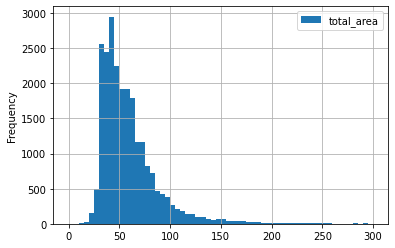

In [37]:
#гистограмма для параметра "площадь"
data.plot(y = 'total_area', kind = 'hist', bins = 60, grid=True, range = (0,300), figsize = (6,4))
data['total_area'].describe()

In [38]:
#new
#смотрим на данные с аномально большой и маленькой площадью
data[(data['total_area'] <= 12) | (data['total_area'] >= 600)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,neighbor_ponds,ponds_nearest,days_exposition,year_exposition,one_meter_price,weekday_exposition,month_exposition,floor_category,living_ratio,kitchen_ratio
3117,19,140000000.0,631.0,2019-03-30,7,NaN,5,30.0,5,False,...,2.0,210.0,0,2019,221870.0,5,3,последний,0.047544,0.095087
12859,20,140000000.0,631.2,2019-04-09,7,3.90,4,322.3,4,False,...,2.0,210.0,0,2019,221799.7,1,4,последний,0.510615,0.030894
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7,258.0,5,False,...,2.0,198.0,111,2017,485436.9,0,12,другой,0.417476,0.113269
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,2.0,318.0,106,2017,466666.7,2,12,последний,0.455222,0.124444
19904,4,2400000.0,12.0,2017-07-19,1,2.55,5,10.0,2,False,...,2.0,45.0,200,2017,200000.0,2,7,другой,0.833333,NaN


 <div class="alert alert-block alert-info">
    
**Комментарий студента**
    
Распредление больше похоже на нормальное распредление Гаусса. Выбросы не сильно влияют на выборку. Данные колеблются от 12м² до 900м², но чаще всего втречаются значения, близкие к среднему. Среднее и медиана не сильно отличаются друг от друга - 60.3м² и 52м², соответсвенно.

</div> 

count      0.023565
mean       6.540058
std       10.910935
min        0.012190
25%        3.400000
50%        4.646000
75%        6.790000
max      763.000000
Name: last_price, dtype: float64

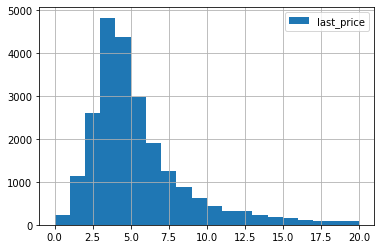

In [39]:
#гистограмма для параметра "цена"
(data['last_price']/(10**6)).hist(range = (0,20), bins = 20, legend= True, figsize = (6,4))
data['last_price'].describe()/10**6

<div class="alert alert-block alert-info">
    
**Комментарий студента**
    
Снова видим нормальное распределение Гаусса. Средняя стоимость квартирыв Ленобласти - 6.5 млн.р., медианное значение стоимости жилплощади - 4.6 млн.р. 

</div> 

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

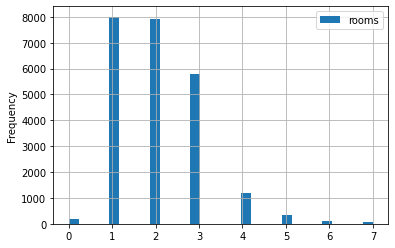

In [40]:
#гистограмма для параметра "число комнат"
data.plot(y = 'rooms', kind = 'hist', range= (0,7), bins = 30, grid= True,figsize = (6,4))
data['rooms'].describe()

<div class="alert alert-block alert-info">
    
**Комментарий студента**

Количество комнат варьируется 0 до 19. Крайние значение похожи на аномалии. Больше всего объявлений о продаже однокомнатных квартир, на втором месте - двухкомнатные, на третьем- трехкомнатные. 

</div> 

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

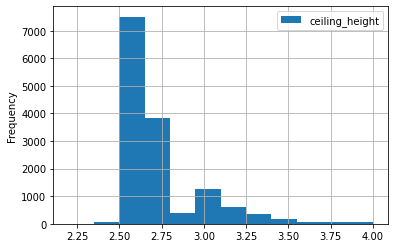

In [41]:
#гистограмма для параметра "высота потолков"
data.plot(y= 'ceiling_height', kind= 'hist', range= (2.2, 4), bins= 12, grid= True, figsize = (6,4))
data['ceiling_height'].describe()

<div class="alert alert-block alert-info">
    
**Комментарий студента**
    
Высота потолков в среднем равна 2,7 м, медиана 2,65 м. Также есть аномальные занчения.
    
**Вывод**

В каждом из этих столбцов есть аномальные занчения. Например, минимальная цена квартиры равна 12190 рублей, в данных есть квартиры с количеством комнат, равным  нулю, также есть жилые помещения с высотой потолков в 100 метров и 1 метр. Пока не будем удалять эти значения.
</div> 

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

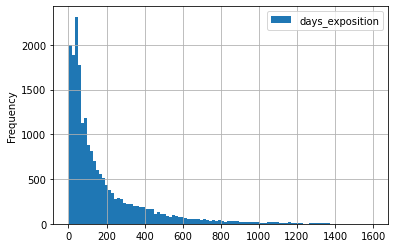

In [42]:
#строим гистограмму
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,1600))

#т.к объявление не могло быть размещено 0 дней, исключаем это значение (пока только для просмотра данных, 
#но не совсем из данных)
data[data['days_exposition']!=0]['days_exposition'].describe()

(1.0, 800.0)

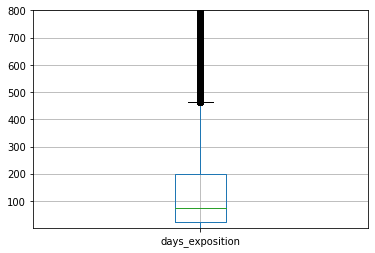

In [43]:
data[['days_exposition']].boxplot()
plt.ylim(1,800)
# plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
# plt.ylim(1,800)

<div class="alert alert-block alert-info">
    
**Комментарий студента**
    
Данные имеют распределение Пуассона. Среднее (180) и медиана (95) отличаются друг от друга почти в 2 раза. Это происходит из-за аномально больших значений. К примеру, максимальное количество времени, в течение которого было размещено объявление, равно четырем с лишним годам. 

Попробуем отсечь слишком большие значения и посмотрим, что происходит с гистограммой.

</div> 

<AxesSubplot:ylabel='Frequency'>

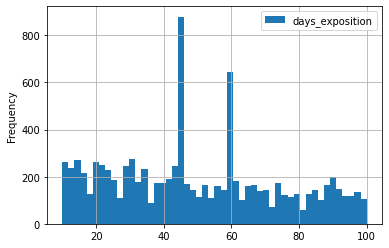

In [44]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid = True, range = (10,100))

<div class="alert alert-block alert-info">
    
**Комментарий студента**
    
Сильно выбиваются значения в 45 и 60 дней.По првилам Яндекс Недвижимость объявления о продаже квартир или домов автоматически снимаются в течение этого времени, взависимости от цены квартиры и, скорее всего, если не продлевать срок размещения за отдельную плату. Предполагаю, что особенно большой всплеск на 45 дняx связан с тем, что больше всего объявлений о продаже однокомнатных квартир. Именно эти объявления снимаются на 45 день.
    
**Вывод**

Отвечая на поставленный вопрос, добавим, что обычно продажа недвижимости занимает от 45 до 235 дней. На диаграмме размаха видно, что если сделка не состоялась в течение 500 дней, то ее можно назвать необычно долгой. Нижний предел нормального значения на диаграмме не обозначен. Это значит, что нельзя сказать, что какие-то продажи прошли необыкновенно быстро.

</div> 

In [45]:
data[(data['days_exposition']== 45) | (data['days_exposition']== 90) | (data['days_exposition']== 30) | (data['days_exposition']== 60)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,neighbor_ponds,ponds_nearest,days_exposition,year_exposition,one_meter_price,weekday_exposition,month_exposition,floor_category,living_ratio,kitchen_ratio
12,10,3890000.0,54.0,2016-06-30,2,NaN,5,30.0,5,False,...,NaN,NaN,90,2016,72037.0,3,6,последний,0.555556,0.166667
22,20,5000000.0,58.0,2017-04-24,2,2.75,25,30.0,15,False,...,NaN,NaN,60,2017,86206.9,0,4,другой,0.517241,0.189655
78,9,4350000.0,37.0,2018-02-22,1,NaN,19,18.0,6,False,...,0.0,NaN,45,2018,117567.6,3,2,другой,0.486486,0.289189
82,3,4500000.0,80.5,2018-01-15,3,NaN,25,30.0,16,False,...,0.0,NaN,60,2018,55900.6,0,1,другой,0.372671,NaN
89,9,2500000.0,63.0,2018-10-25,3,2.50,5,43.0,4,False,...,NaN,NaN,45,2018,39682.5,3,10,другой,0.682540,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23635,9,5100000.0,36.0,2018-10-26,1,2.80,15,18.0,11,False,...,1.0,405.0,60,2018,141666.7,4,10,другой,0.500000,0.222222
23642,14,5950000.0,80.3,2018-07-03,3,2.70,12,30.0,5,False,...,2.0,562.0,60,2018,74097.1,1,7,другой,0.373599,NaN
23670,9,2450000.0,45.6,2018-02-08,1,2.80,9,30.0,2,False,...,NaN,NaN,45,2018,53728.1,3,2,другой,0.657895,NaN
23679,0,2500000.0,35.0,2017-12-08,1,NaN,9,30.0,4,False,...,NaN,NaN,45,2017,71428.6,4,12,другой,0.857143,NaN


<a id = 'step4_3'></a>
<font color='black' size = +1><b>Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.</b></font><br>

In [46]:
#удаляем выбивающиеся значения и записываем их в переменную "good_data"
good_data = data.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 0')

count    18569.000000
mean       193.331089
std        226.344078
min          1.000000
25%         43.000000
50%        112.000000
75%        255.000000
max       1580.000000
Name: days_exposition, dtype: float64

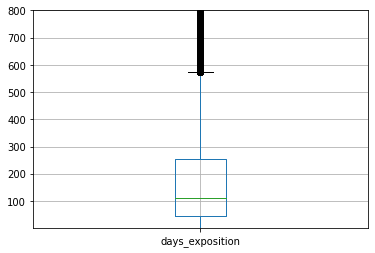

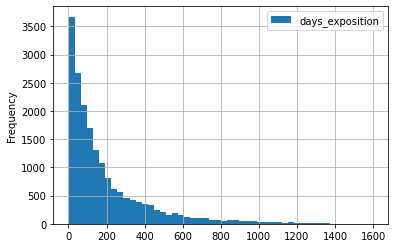

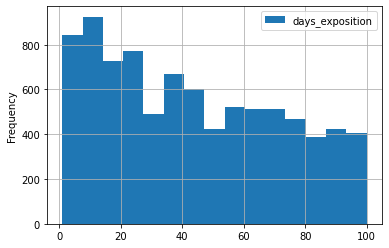

In [47]:
#диаграмма размаха
#plt.boxplot(good_data['days_exposition'])
good_data[['days_exposition']].boxplot()
plt.ylim(1,800)


#гистограммы
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 50, grid = True, range = (1,1600))
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 15, grid = True, range = (1,100))

#среднее значение, медиана и межквартильный размах
#good_data['days_exposition'].value_counts()
good_data['days_exposition'].describe()

In [48]:
good_data[good_data['days_exposition'] == 45]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,neighbor_ponds,ponds_nearest,days_exposition,year_exposition,one_meter_price,weekday_exposition,month_exposition,floor_category,living_ratio,kitchen_ratio


In [49]:
#наличие пропусков на этом этапе
data['days_exposition'].isna().sum()

0

<div class="alert alert-block alert-info">
    
**Комментарий студента**
    
После очищения данных от выбивающихся значений среднее и медиана равны 193 и 112 соответственно. Нормальные значения располагаются от 1 до ~600 дней вместо от 1 до 500 дней.

Уберем редкие значения, воспользовавшись графиком boxplot. Отсечем всё, что лежит за значением  Q3+1.5*IQR.
</div> 


In [50]:
#Находим значение, начиная с которого будет отсекать данные
point = 255 + 1.5*(255 - 43)
point

573.0

In [51]:
#всего получаем 566 строк со значениями, встречающимися действительно редко
good_data.query('days_exposition > @point')['days_exposition'].value_counts()

594     11
719     11
574     10
626     10
788     10
        ..
1553     1
793      1
1434     1
1231     1
971      1
Name: days_exposition, Length: 566, dtype: int64

<AxesSubplot:ylabel='Frequency'>

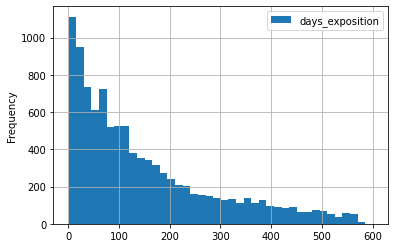

In [52]:
#отсекаем эти данные, данные с сомнительной высотой потолков и данные с аномальной площадью
good_data = good_data.query('days_exposition <= @point and 12 < total_area < 600 and 2 <= ceiling_height < 100')

#гистограмма
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 40, grid = True, range = (1,600))

In [53]:
#данные с необычными высотами потолков 
data.loc[(data.loc[:,'ceiling_height'] >= 4.9) | (data.loc[:,'ceiling_height'] < 2)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,neighbor_ponds,ponds_nearest,days_exposition,year_exposition,one_meter_price,weekday_exposition,month_exposition,floor_category,living_ratio,kitchen_ratio
355,17,3600000.0,55.2,2018-07-12,2,25.00,5,32.0,2,False,...,NaN,NaN,259,2018,65217.4,3,7,другой,0.579710,NaN
464,15,66571000.0,280.3,2015-06-11,6,5.20,8,159.5,7,False,...,1.0,616.0,578,2015,237499.1,3,6,другой,0.569033,0.075276
1026,20,155000000.0,310.0,2018-10-12,5,5.30,3,190.0,3,False,...,1.0,603.0,0,2018,500000.0,4,10,последний,0.612903,0.203226
1053,13,550000.0,29.0,2018-02-01,1,5.00,3,30.0,1,False,...,NaN,NaN,6,2018,18965.5,3,2,первый,1.034483,NaN
1388,20,59800000.0,399.0,2015-01-21,5,5.60,6,30.0,6,False,...,2.0,577.0,719,2015,149874.7,2,1,последний,0.075188,NaN
3148,14,2900000.0,75.0,2018-11-12,3,32.00,3,53.0,2,False,...,NaN,NaN,0,2018,38666.7,0,11,другой,0.706667,0.106667
3474,3,1400000.0,30.0,2018-03-16,1,8.00,5,15.3,2,False,...,NaN,NaN,125,2018,46666.7,4,3,другой,0.510000,0.243333
4643,0,4300000.0,45.0,2018-02-01,2,25.00,9,30.0,2,False,...,1.0,331.0,181,2018,95555.6,3,2,другой,0.666667,0.155556
4876,7,3000000.0,25.0,2017-09-27,0,27.00,25,17.0,17,False,...,NaN,NaN,28,2017,120000.0,2,9,другой,0.680000,NaN
5076,0,3850000.0,30.5,2018-10-03,1,24.00,5,19.5,1,True,...,1.0,578.0,7,2018,126229.5,2,10,первый,0.639344,0.180328


In [54]:
#заполним пропуски в столбце ceilling_height значением 4.95, чтобы при срезе не потерять их
data['ceiling_height'] = data['ceiling_height'].fillna(4.95)

In [55]:
data = data.query('days_exposition <= @point and 12 < total_area < 600 and days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and 2 < ceiling_height <= 4.95')

In [56]:
# #можно вернуть пропуски 
import warnings
warnings.simplefilter('ignore')
data.loc[data['days_exposition'] == 0,'days_exposition'] = None
data.loc[data['ceiling_height'] == 4.95,'ceiling_height'] = None

In [57]:
data['ceiling_height'].describe()

count    12626.000000
mean         2.722274
std          0.267431
min          2.300000
25%          2.510000
50%          2.650000
75%          2.800000
max          4.900000
Name: ceiling_height, dtype: float64

In [58]:
domen = data.pivot_table(index = 'locality_name', values = 'days_exposition', aggfunc = ['median','count'])
domen.columns = ['median', 'count'] 

#возьмем первые 10 строк по числу измерений и отсортируем по возрастанию
domen_ten = domen[~domen['median'].isna()].sort_values('count', ascending = False)[:10]
domen_ten.sort_values('median', ascending = True)[:10]

,median,count
locality_name,,
поселок мурино,80.0,484
деревня кудрово,81.5,242
колпино,83.0,265
поселок парголово,94.0,251
санкт-петербург,97.0,11556
поселок шушары,101.0,346
гатчина,101.5,222
выборг,112.5,164
всеволожск,126.0,282


<div class="alert alert-block alert-info">
    
<h2> Комментарий студента <a class="tocSkip"></h2>
 
Быстрее других в Ленинградской области продаются квартиры в близлежащих к Санкт-Петербургу Мурино (который уже не поселок) ,Кудрово (которое уже нельзя назвать деревней) и Колпино. Видимо, люди считают, что это оптимальный вариант по цене и удаленности от центра. 
</div>

In [59]:
#как еще можно было ответить на вопрос про скорость продаж квартир
#напишем функцию, которая ищет  долю квартир, проданных в 2 раза быстрее, чем обычно(медианное значение, деленное на 2)
#в конкретном населенном пункте,
#функцию будем применять к столбцу с временем продаж в данных, сгруппированных по населенному пункту

def days(column):
    column = column[~column.isna()]
    mediana = column.median()
    #print(column < mediana*0.5, len(column < mediana*0.5))
    
    return len(column),(column < mediana*0.5).sum()/len(column), mediana/2

In [60]:
#группируем данные по населенному пункту и применяем написанную функцию
#сортируем данные по убыванию и смотрим первые 10 строк

data.groupby('locality_name')['days_exposition'].apply(days).sort_values(ascending = False)[:10]

locality_name
санкт-петербург      (11556, 0.30494980962270685, 48.5)
поселок мурино          (484, 0.2871900826446281, 40.0)
поселок шушары          (346, 0.2861271676300578, 50.5)
всеволожск              (282, 0.3049645390070922, 63.0)
колпино                 (265, 0.2943396226415094, 41.5)
пушкин                  (263, 0.2737642585551331, 63.5)
поселок парголово       (251, 0.2908366533864542, 47.0)
деревня кудрово       (242, 0.28512396694214875, 40.75)
гатчина               (222, 0.27927927927927926, 50.75)
выборг                (164, 0.31097560975609756, 56.25)
Name: days_exposition, dtype: object

<div class="alert alert-block alert-info">
    
<h2> Комментарий студента <a class="tocSkip"></h2>
    
Получившийся резуьтат трактуем так (по первой строке): В Санкт-Петербурге из 11556 квартир 30% было продано в 2 раза быстрее, чем  обычно (за ~48 дней). 
</div>

<a id = 'step4_4'></a>
<font color='black' size = +1><b>Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.</b></font><br>

<font color='black'><b> Зависимость цены от площади</b></font><br>

<AxesSubplot:xlabel='total_area'>

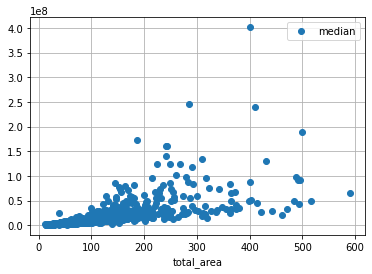

In [61]:
#создадим сводную таблицу по площадям квартир со срнедним и медианным значениями цены и количсвтом объявлений
pivot_total_area = data.pivot_table(index = 'total_area', 
                                    values = 'last_price',
                                    aggfunc = ['mean','median', 'count']
                                   )
#переименуем названия колонок
pivot_total_area.columns = ['mean', 'median', 'count']
#построим диаграмму рассеивания
pivot_total_area.plot(y = 'median', style = 'o', grid = True)

<div class="alert alert-block alert-info">
    
**Вывод**

Получили очевидный результат: чем больше площадь жилплощади, тем выше ее цена.<br>
</div> 

<font color='black'><b> Зависимость цены от числа комнат</b></font><br>

In [62]:
#создадим сводную таблицу по площадям квартир со срнедним и медианным значениями 
pivot_rooms = data.pivot_table(index = 'rooms', 
                                    values = 'last_price',
                                    aggfunc = ['mean','median', 'count']
                              )
pivot_rooms.columns = ['mean', 'median', 'count']
pivot_rooms

,mean,median,count
rooms,,,
0,2.979358e+06,2700000.0,167
1,3.837383e+06,3600000.0,6952
2,5.596772e+06,4800000.0,6836
3,8.146483e+06,6200000.0,4981
4,1.333520e+07,9000000.0,997
5,2.240037e+07,13800000.0,260
6,3.330303e+07,19500000.0,86
7,4.601243e+07,24900000.0,51
8,4.337667e+07,24000000.0,9


<AxesSubplot:xlabel='rooms'>

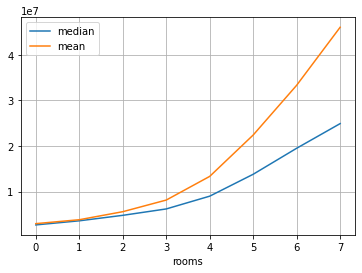

In [63]:
#выводим графики, где число квартир больше 12
pivot_rooms.query('count > 12').plot(y = ['median', 'mean'], grid = True)

In [64]:
#смотрим коэффициент корреляции
data['rooms'].corr(data['last_price'])

0.3503899552144808

<AxesSubplot:xlabel='rooms'>

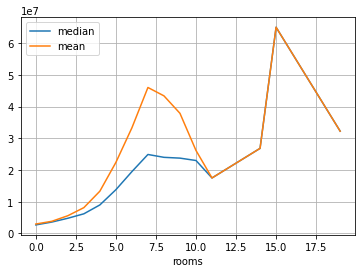

In [65]:
#коэффициент корреляции оказался не таким высоким, как ожидалось.
#построим график зависимости цены от числа комнат, не отсекая данные с числом комнат, встречающихся меньше 12 раз
pivot_rooms.plot(y = ['median', 'mean'], grid = True)

<div class="alert alert-block alert-info">
    
**Комментарий студента**
    
Вот и причина такого низкого коэффициента корреляции. Самая дорогая недвижимость с 15 комнатами.Это наталкивает на мысль, что все-таки на корреляцию сильно влияет еще и третий параметр, пока предполагаем, что это площадь. 
    
**Вывод**
    
Исключая редкие многокомнатные дома с большой площадью, получаем логичный результат: с ростом числа комнат увеличивается и стоимость жилища

</div> 

<font color='black'><b> Зависимость цены от удаленности от центра</b></font><br>

In [66]:
#создадим сводную таблицу по площадям квартир со срнедним и медианным значениями 
pivot_centre = data.pivot_table(index = 'distance_to_centre', 
                                    values = 'last_price',
                                    aggfunc = ['mean','median', 'count']
                               )
pivot_centre.columns = ['mean', 'median', 'count']

<AxesSubplot:xlabel='distance_to_centre'>

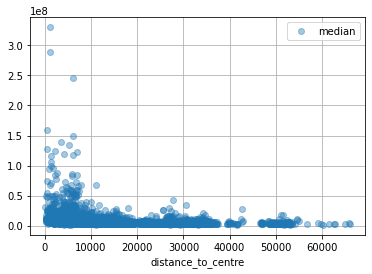

In [67]:
#построим диаграмму рассеивания
pivot_centre.plot(y = ['median'], grid = True, style = 'o',alpha = 0.4)

<AxesSubplot:xlabel='distance_to_centre'>

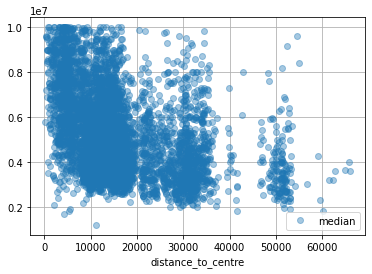

In [68]:
#диаграмма рассеивания без учета выделяющихся данных
pivot_centre.query('median <= 1*10**7').plot(y = ['median'], grid = True, style = 'o',alpha = 0.4)


In [69]:
#как показывает коэф. Пирсона, корреляция очень низкая
data['distance_to_centre'].corr(data['last_price'])

-0.20732072482185915

<div class="alert alert-block alert-info">
    
**Вывод**

Здесь видно, что ярковыраженной корреляции нет, хотя есть несколько квартир рядом с центром, которые стоят значительно дороже остальных. Возможно, это квартиры элитных районов. В целом, можно при покупке предположить, что квартры ближе к центру стоят дороже, это не всегда так, а если и так, то не всегда разница в цене очень большая. Видимо, влияют и дргуие факторы: число комнат,площадь, наличие парков и т.д

</div> 

<font color='black'><b> Зависимость цены от этажа</b></font><br>


In [70]:
#аналогично заданиям выше создаем сводную таблицу
pivot_floor = data.pivot_table(index = 'floor_category', 
                                    values = 'last_price',
                                    aggfunc = ['mean','median', 'count']
                               )
pivot_floor.columns = ['mean', 'median', 'count']

In [71]:
pivot_floor

,mean,median,count
floor_category,,,
другой,6.576181e+06,4821500.0,15014
первый,4.859571e+06,3900000.0,2489
последний,7.149635e+06,4337500.0,2850


<AxesSubplot:xlabel='floor_category'>

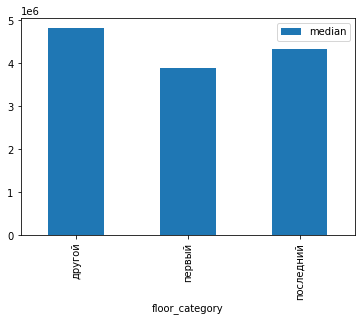

In [72]:
pivot_floor.plot(y = ['median'], kind = 'bar')

<div class="alert alert-block alert-info">
    
**Вывод**

Дешевле всего стоят квартиры на 1ом этаже. Дороже стоят квартиры на последних этажах. Но квартиры, которые находятся в диапазоне между первым и последнем этажами, чаще всего самые дорогие.

</div> 


<font color='black'><b>Зависимсоть от даты размещения: день недели </b></font><br>


,mean,median,count
weekday_exposition,,,
1,6.325605e+06,4700000.0,3595
2,6.460430e+06,4700000.0,3389
0,6.481284e+06,4690000.0,3119
3,6.577343e+06,4650000.0,3689
4,6.208978e+06,4550000.0,3499
6,6.204332e+06,4550000.0,1415
5,7.036113e+06,4500000.0,1647


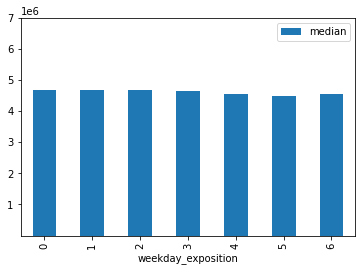

In [73]:
pivot_weekday = data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean','median','count'])
pivot_weekday.columns = ['mean', 'median', 'count']
pivot_weekday.plot(y = 'median',kind = 'bar')
plt.ylim(1,7*10**6)

pivot_weekday.sort_values('median', ascending = False)

<div class="alert alert-block alert-info">
    
**Вывод**
    
Не вижу никакой взаимосвязи. Линейны коэффициент корреляции подтверждает, что зависимости фактически нет.   

</div> 

<font color='black'><b>Зависимсоть от даты размещения: месяц </b></font><br>

,mean,median,count
month_exposition,,,
4,6.686663e+06,4800000.0,2152
2,6.599969e+06,4710000.0,2259
9,6.849359e+06,4699000.0,1735
3,6.290682e+06,4650000.0,2230
11,6.313674e+06,4650000.0,2098
1,6.507371e+06,4600000.0,1229
7,6.485984e+06,4600000.0,1417
10,6.128215e+06,4600000.0,1901
12,6.030117e+06,4600000.0,1276


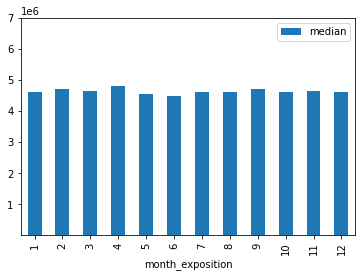

In [74]:
pivot_month = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean','median','count'])
pivot_month.columns = ['mean', 'median', 'count']
pivot_month.plot(y = 'median', kind = 'bar')
plt.ylim(1,7*10**6)

pivot_month.sort_values('median', ascending = False)

<div class="alert alert-block alert-info">
    
**Вывод**

Снова не вижу никакой явной зависимости. Единственное, что можно сказать, - чаще всего на продажу выставляют квартиры в апреле. Возможно, это связано с приходом весны и желанием перемен :)

</div> 

<font color='black'><b>Зависимсоть от даты размещения: год </b></font><br>

,mean,median,count
year_exposition,,,
2014,1.434300e+07,12000000.0,27
2015,8.548332e+06,5100000.0,604
2019,6.721602e+06,5099000.0,2747
2018,6.047562e+06,4600000.0,7531
2016,6.692417e+06,4500000.0,2130
2017,6.479762e+06,4500000.0,7314


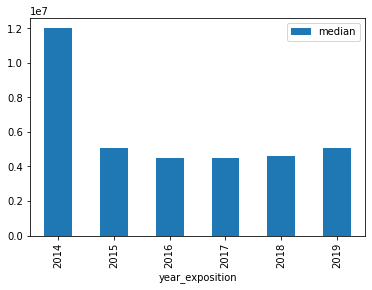

In [75]:
pivot_month = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean','median','count'])
pivot_month.columns = ['mean', 'median', 'count']
pivot_month.plot(y = 'median', kind = 'bar')


pivot_month.sort_values('median', ascending = False)

<div class="alert alert-block alert-info">
    
**Вывод**

В 2014 году произошел заметный спад курса рубля, квартиры сильно подорожали. Отсюда может быть и такое маленьке количесвто проданных квартир. В нестабильное время немногие решаются на приобретение недвижимости. Далее ситуация начала выравниваться, цена на недвижимость начала падать, затем увеличиваться, но плавно. Закономерность если и есть, то только с 2014г по 2016г. В целом, я не могу ее выделить. 

</div> 

In [76]:
data.pivot_table(index = 'year_exposition', values = 'total_area', aggfunc = ['mean','median','count'])

,mean,median,count
,total_area,total_area,total_area
year_exposition,,,
2014,100.675185,102.40,27
2015,69.008063,58.00,604
2016,61.797784,53.30,2130
2017,60.442110,52.00,7314
2018,58.089314,50.62,7531
2019,59.112162,52.00,2747


<a id = 'step4_5'></a>
<font color='black' size = +1><b>Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.</b></font><br>

In [77]:
#cводная таблица по населенным пунктам
pivot_locality = data.pivot_table(index='locality_name', values = 'one_meter_price', aggfunc = ['mean','median','count'])

pivot_locality.columns = ['mean', 'median', 'count']
pivot_locality.sort_values('count', ascending = False)[:10]

,mean,median,count
locality_name,,,
санкт-петербург,114458.922911,104838.7,13622
поселок мурино,85516.221881,85680.5,489
поселок шушары,78773.384656,76748.0,378
всеволожск,68744.550882,65393.9,340
пушкин,103417.521538,99987.2,325
колпино,75638.646780,75000.0,295
поселок парголово,90198.498913,91387.4,276
гатчина,68566.884291,67647.1,261
деревня кудрово,92413.785950,91735.0,242


In [78]:
#средняя цена квадратного метра в этих населённых пунктах ~ 83.6 тыс.р
average_cost = pivot_locality.sort_values('count', ascending = False)[:10]['mean'].mean()
average_cost

83603.26053688288

In [79]:
#самая высокая стоимость
ten = pivot_locality.query('count >= 109')
ten[ten['mean'] == ten['mean'].max()]

,mean,median,count
locality_name,,,
санкт-петербург,114458.922911,104838.7,13622


In [80]:
#самая низкая стоимость
ten[ten['mean'] == ten['mean'].min()]

,mean,median,count
locality_name,,,
выборг,58304.187565,58158.3,193


<div class="alert alert-block alert-info">
    
**Вывод**
    
Самая высокая стоимость жилья в Ленинградской области, ожидаемо, в Санкт-Петербурге, самая низкая - в Выборге

</div> 

<a id = 'step4_6'></a>
<font color='black' size = +1><b>Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.</b></font><br>

In [81]:
#создаем  новый столбец с расстоянием до центра в км
data['distance_to_centre_km'] = data['distance_to_centre']/1000

#в данных есть пропуски, заполним их сейчас большим значением
data['distance_to_centre_km'] = data['distance_to_centre_km'].fillna(999999)

#округляем до целых
data['distance_to_centre_km'] = data['distance_to_centre_km'].astype('int')

#выделим данные по санкт-петербургу
spb_data = data.query('locality_name == "санкт-петербург" and distance_to_centre_km != 999999')

#посчитаем среднюю цену для каждого километра с помощью сводной таблицы
pivot_distance = spb_data.pivot_table(index= 'distance_to_centre_km', values = 'one_meter_price',aggfunc = ['mean','median','count'])
pivot_distance.columns = ['mean', 'median', 'count']

<AxesSubplot:xlabel='distance_to_centre_km'>

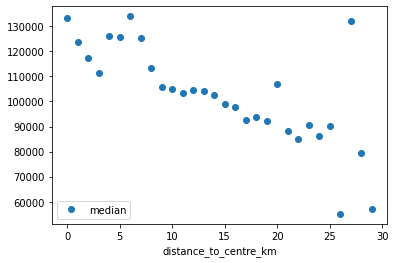

In [82]:
pivot_distance.plot(y = 'median', style = 'o')

<div class="alert alert-block alert-info">
    
**Вывод**

Исходя из получившегося графика, можно предположить, что область до 8 км считается центральной. После отметки в 8 км цена планомерно снижается.

</div> 

<a id = 'step4_7'></a>
<font color='black' size = +1><b>Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?</b></font><br>

In [83]:
#выделим данные, относящиеся к центру
data_centre = spb_data.query('distance_to_centre_km < 8')

In [84]:
data_centre['total_area'].describe()

count    3076.000000
mean       90.579906
std        56.514643
min        13.000000
25%        55.475000
50%        77.000000
75%       108.000000
max       590.000000
Name: total_area, dtype: float64

In [85]:
data_centre['rooms'].describe()

count    3076.000000
mean        2.786411
std         1.422087
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

In [86]:
data_centre['last_price'].describe()/10**6

count      0.003076
mean      14.324439
std       23.815879
min        1.600000
25%        6.500000
50%        8.990000
75%       14.125000
max      763.000000
Name: last_price, dtype: float64

In [87]:
data_centre['ceiling_height'].describe()

count    2012.000000
mean        3.073912
std         0.357160
min         2.400000
25%         2.800000
50%         3.000000
75%         3.270000
max         4.900000
Name: ceiling_height, dtype: float64

<div class="alert alert-block alert-info">
    
**Комментарий студента**

В центре города средняя цена жилплощади составляет примерно 14 млн.р. Здесь же, как и следовало ожидать, находится самая дорогая квартира во всем датафрейме - 763 млн.р. Площадь квартир, выставленных на продажу, как правило, равна 77 м². Самый популярный вариант - с 3 комнатами. Высота потолков приблизительно 2.8 м. 


</div> 

-0.003054861920189751

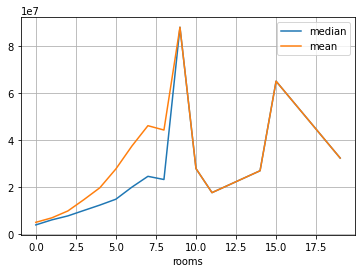

In [88]:
#анализируем зависимость цены от числа комнат
spb_сentre_rooms = data_centre.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean','median','count'])
spb_сentre_rooms.columns = ['mean','median','count']
spb_сentre_rooms.plot(y = ['median', 'mean'], grid = True)

spb_сentre_rooms.sort_values('median', ascending = False)

data_centre['rooms'].corr(data_centre['one_meter_price'])

<div class="alert alert-block alert-info">
    
**Вывод**

Похожую картину мы уже видели, когда изучали все данные. Судя по всему, между ценой и количесвтом комнат линейной зависимости точно нет. Хотя графики до 7 комнат говорят об обратном - с увеличением комнат растет и цена (та же ситуация, как и со всеми данными). Но всё же не могу сказать, что сущетсвует какая-то явная зависимость.

</div> 

In [89]:
#анализируем зависимость цены от этажа
spb_centre_floor = data_centre.pivot_table(index = 'floor_category', 
                                    values = 'last_price',
                                    aggfunc = ['mean','median', 'count']
                               )
spb_centre_floor.columns = ['mean', 'median', 'count']

<AxesSubplot:xlabel='floor_category'>

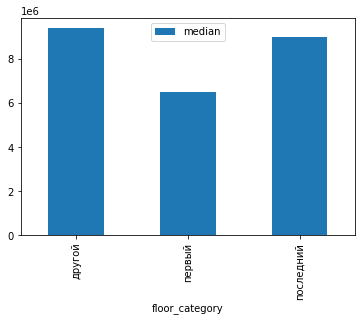

In [90]:
spb_centre_floor.plot(y = ['median'], kind = 'bar')

<div class="alert alert-block alert-info">
    
**Вывод**

Здесь та же ситуация, что и со всей базой данных. Продублирую вывод: дешевле всего стоят квартиры, которые находятся на 1ом этаже; дороже стоят квартиры на последних этажах; вартиры, которые находятся в диапазоне между первым и последнем этажами, также самые дорогие, хотя здесь различия в цене чуть меньше.

</div> 

In [91]:
#анализируем зависимость цены от удаленности от центра
spb_distance_centre = data_centre.pivot_table(index = 'distance_to_centre', 
                                    values = 'last_price',
                                    aggfunc = ['mean','median', 'count']
                               )
spb_distance_centre.columns = ['mean', 'median', 'count']

<AxesSubplot:xlabel='distance_to_centre'>

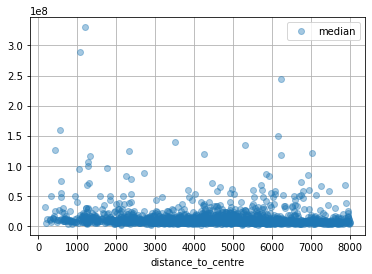

In [92]:
spb_distance_centre.plot(y = ['median'], grid = True, style = 'o',alpha = 0.4)

In [93]:
data_centre['distance_to_centre'].corr(data_centre['last_price'])

-0.07132016107102665

<div class="alert alert-block alert-info">
    
**Вывод**

Зависимости так же, как и со всей выборкой, не наблюдается

</div> 

,mean,median,count
weekday_exposition,,,
0,1.400353e+07,9200000.0,478
2,1.406753e+07,9000000.0,516
6,1.502762e+07,8970000.0,171
4,1.357442e+07,8945000.0,526
1,1.374446e+07,8900000.0,529
3,1.391531e+07,8850000.0,617
5,1.900839e+07,8800000.0,239


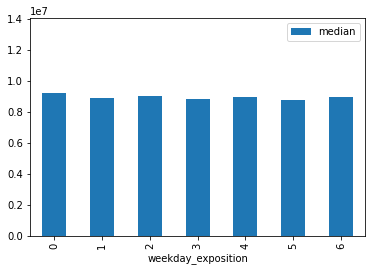

In [94]:
#анализируем зависимость цены от даты размещения: день недели
spb_weekday = data_centre.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean','median','count'])
spb_weekday.columns = ['mean', 'median', 'count']
spb_weekday.plot(y = 'median',kind = 'bar')
plt.ylim(0, 10.5**7)
spb_weekday.sort_values('median', ascending = False)

,mean,median,count
month_exposition,,,
1,1.524706e+07,9900000.0,164
2,1.529934e+07,9500000.0,341
3,1.413325e+07,9500000.0,340
7,1.442280e+07,9200000.0,234
9,1.582816e+07,9000000.0,273
11,1.362078e+07,9000000.0,309
8,1.393586e+07,8900000.0,244
6,1.461393e+07,8750000.0,251
4,1.569376e+07,8710840.0,308


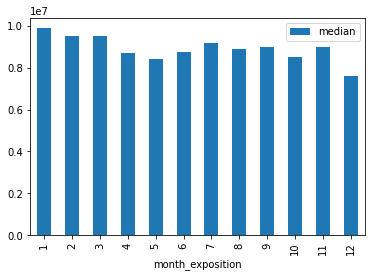

In [95]:
#анализируем зависимость цены от даты размещения: месяц
spb_month = data_centre.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean','median','count'])
spb_month.columns = ['mean', 'median', 'count']
spb_month.plot(y = 'median',kind = 'bar')

spb_month.sort_values('median', ascending = False)

,mean,median,count
year_exposition,,,
2014,2.794500e+07,27945000.0,2
2015,1.907481e+07,10500000.0,141
2019,1.471620e+07,9400000.0,381
2016,1.486278e+07,9200000.0,385
2017,1.465412e+07,8900000.0,1171
2018,1.287903e+07,8800000.0,996


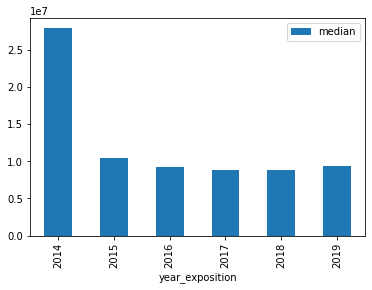

In [96]:
#анализируем зависимость цены от даты размещения: год
spb_year = data_centre.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean','median','count'])
spb_year.columns = ['mean', 'median', 'count']
spb_year.plot(y = 'median',kind = 'bar')

spb_year.sort_values('median', ascending = False)

<div class="alert alert-block alert-info">
    
**Вывод**

Снова видим ту же ситуацию, что и со всеми данными. Цена не зависит от дня недли и месяца размещения объявления. Единсвтенное отличие - больше всего объявлений сделано не в апреле, а в январе. И аналогичная ситуация с 2014 годом. Цены на квартиры тогда были самыми высокими, а объявлений о продаже так же было меньше всего.
</div> 

<a id = 'step5'></a>
# 5. Общий вывод

<font color='black'><b>После предобработки, дополнения и изучения предоставленных данных было выяснено, что в Ленинградской области квартиры продаются в крайнем случае в течение полутора лет (573 дня). Мы выявили, что на стоимость квартиры влияет этаж, кличество комнат, если это количество комнат увеличивается вместе с общей площадью жилья и если количесвто комнат не превышает 7. Самые дорогие квартиры находятся в центре Петербурга. Центр Петербурга по нашим исследованиям находится в радиусе 8 км.Самый дешевый вариант - приобрести домик в деревне Старополье (это 3 часа езды на машине до Санкт-Петербурга). В 2014 году был всплеск рост цен на недвижимость. Затем понемногу ситуация с ценами начала стабилизироваться, а к 2019 году цены подросли .</b></font><br>

<div class="alert alert-block alert-info">
    
<h2> Комментарий студента (выводы) <a class="tocSkip"></h2>

1. На рыночную стоимость квартиры больше всего влияют её площадь и количество комнат. Последнее справедливо только для квартир, где количество комнат не превышает 7. Чаще всего квартиры либо первого, либо последнего этажа стоят дешевле. День недели, месяц и год размещения объявления на цену не влияют.
    
2. Изучая время продажи квартиры, было замечено, что выделяются значения в 30, 45, 60 и 90 дней. Как выяснилось, это связано с тем, что в эти дни объявления на Я.Недвижимость снимаются автоматически. Это значит, что мы мало что можем сказать о том, с каким успехом продавались эти квартиры. Доля таких данных составляла 7% от общего объема информации. В конечном итоге было принято решение очистить датафрейм от этих данных.<br>
   Здесь же было замечено, что 2% квартир продавалось аномально долго - больше полутора года, - когда в среднем кваритиры продаются в течение 3-х месяцев. От этих данных мы тоже избавились.<br>
   Почти 14% от всех данных пропущено в столбце с временем продажи квартир. Мы предположили, что данные отсутсвуют там, где квартиры еще не проданы, и оставили их.<br>
   В ходе исследования мы столкнулись с довольно большим объемом пропусков в данных - почти 40%, - характеризующих высоту потолков квартир. В конечном итоге было принято решение эти пропуски оставить. Хотя заполнение их медианным значением не сильно влияет на конечный результат. Скорее всего, из-за того, что высота потолков у большинства квартир примерно одна и та же. Также мы обнаружили данные в датафрейме, которые впоследствии удалиии, с необычно высокими и низкими потолками (
    ниже 2м и выше 4.9 м).<br>
    Кроме того, были удалены строки с квартирами аномально больших и маленьких рахмеров (900м² и меньше 12м²)<br>
    Всего было удалено около 15% данных.
    
3. Очевидно, что из этих данных можно было бы извлечь еще больше информации. Так, например, мы не использовали сведения о парках и водоемах. Думаю, что их наличие в окрестности жилплощади влияет на её стоимость. Мы не рассматривали расстояние до ближайшего аэропорта. А также оставили без внимания столбец с количеством фотографий квартир, выставленных на продажу. Полагаю, что от их количества может зависить число заинтересовавшихся лиц в покупке рассматриваемого жилья. 
</div>

<a id = 'step6'></a>
## Чек-лист готовности проекта

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод